# AutoGrad & Optimizer

## 논문을 구현하는 경우

* Layer = Block
  * layer 단위로 계속 반복이 되기 때문에 block 처럼 만들어서 연결함

## torch.nn.Module
* block을 만들기 위한 `torch`의 가장 기본적인 module

### torch.nn.Module

* 딥러닝을 구성하는 Layer의 base class
* Input, Output, Forward, Backward 4가지를 정의함
  * Input, Output은 optional하게 정의하지만 대부분 정의함
  * Backward
    * AutoGrad(자동으로 미분해줌)
    * Weight 값을 미분함
* 학습의 대상이 되는 parameter(tensor)를 정의함
* `nn.Module`로 만들 수 있는 layer는 다음 그림과 같음
  * Forward($f$)
    * $x, y$ : input
    * $f(x, y)$ : fomula(process)
      * $wx + b \rightarrow z$에서 $w$와 $b$가 fomula안에 포함되어 있음
    * $z$ : output
  * Backward($df$)
    * $df$ : $dL \over dw$ 또는 $dL \over db$
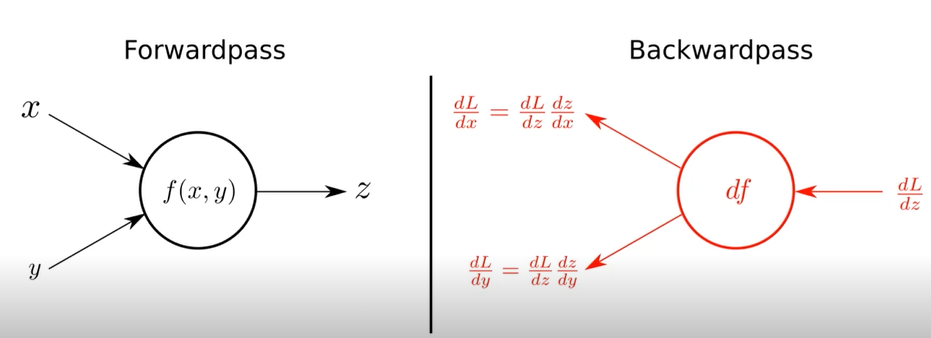

### nn.Parameter

* `nn.Module`을 정의하기 위해 학습의 대상이 되는 weight 값들을 정의해야 함
  * 이 weight를 `nn.Parameter` class에 정의함
* Tensor 객체의 상속 객체
* `nn.Module` 내에 attribute가 될 때는 `required_grad=True`로 자동 지정되어(AutoGrad) 학습 대상이 되는 Tensor
* `torch`의 대부분의 layer에는 weight 값들이 지정되어 있기 때문에 가져와서 사용하면 됨
  * 직접 지정할 일은 거의 없음

* 구성 예시
  * `in_features` : input이 되는 feature
    * weight의 개수
  * `out_features` : output이 되는 feature
  * $7$개의 feature를 넣어서 $5$개로 바꾸는 경우
    * 3개의 batch data에 7개의 feature를 넣어서($3 \times 7$) 5개로 바꾸는 경우($3 \times 5$) $7 \times 5$의 weight가 있어야 $3 \times 5$의 output이 나오게 됨
    * $7 \times 5$ 만큼의 weight 값들을 지정해줘야 함

In [7]:
import torch
import torch.nn as nn
class MyLinear(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weights = nn.Parameter(torch.randn(in_features, out_features))
        # nn.Parameter()로 구현하는 것은 low level API 이고 이렇게 구현하는 경우는 거의 없음
        # self.weights = Tensor(torch.randn(in_features, out_features))
        
        self.bias = nn.Parameter(torch.randn(out_features))
        # self.bias = Tensor(torch.randn(out_features))
        
    def forward(self, x : Tensor):
        return x @ self.weights + self.bias

In [8]:
x = torch.randn(5, 7)
x

tensor([[ 1.4025,  1.5588,  0.4272, -0.3409,  0.4624,  1.6747, -0.3360],
        [ 1.0265, -0.8712,  0.6776, -0.9334,  0.8694,  1.8687, -0.8956],
        [-0.5289, -0.5853,  0.5110, -0.3576, -0.6639, -1.8107, -0.2257],
        [ 0.5964,  0.0075, -0.9376,  0.2892,  0.1104,  0.4501,  0.4832],
        [ 2.0244,  0.5368,  1.0726, -1.8071, -0.4618, -0.0990,  0.3828]])

In [10]:
layer = MyLinear(7, 12) # weight
layer(x).shape # layer(x) : 7개의 feature를 넣어서 12개로 바꿈, batch data는 5개

torch.Size([5, 12])

In [11]:
for value in layer.parameters(): # 미분의 대상이 되는 것만 보여주기 때문에 backward propagation에 대상이 되지 않는 값들은 출력하지 않음
  print(value) # 학습이 되는 각각의 parameter 들의 weight 값과 bias값 # Tensor()로 구현한 경우 값이 출력되지 않음

Parameter containing:
tensor([[-3.7243e-01, -4.6485e-01, -1.0533e+00,  5.2978e-01, -1.4139e-01,
          8.4227e-01,  1.8693e+00, -2.4000e-01,  4.1961e-01,  1.6540e+00,
         -1.5596e-01, -1.7833e-01],
        [-5.3428e-01,  9.2561e-01,  1.2333e+00, -1.2143e+00, -2.0010e+00,
         -8.6211e-01, -1.8783e-01,  3.1408e-01, -8.0311e-01, -1.7564e+00,
         -2.4897e-01, -3.8863e-01],
        [-4.5182e-01,  2.0605e+00, -3.7492e-01, -2.9412e-01,  3.9098e-02,
         -1.8905e+00, -1.9688e-01, -9.9709e-02,  2.4270e-01, -1.7556e-01,
          5.1863e-01, -7.8704e-02],
        [ 1.0155e+00,  4.2404e-01, -2.0848e-01, -1.8785e+00, -4.6677e-01,
         -1.1189e+00, -9.2330e-01,  1.0560e-01,  6.1231e-01,  2.5632e-01,
          1.2229e+00,  1.4433e+00],
        [ 4.4664e-01,  1.8115e+00,  2.0248e-01,  7.4524e-01, -1.3106e+00,
         -1.4634e-01, -9.8547e-01,  1.2567e+00,  6.9886e-01,  8.4192e-01,
          1.0955e+00, -5.1588e-01],
        [ 1.6505e+00, -3.0399e-04,  1.6665e+00,  2.1444e+0

### Backward

* Layer에 있는 Parameter들의 미분을 수행함

* Forward의 결과값 (model의 output=예측치. $\hat{y}$)과 실제값간의 차이(loss)에 대해 미분(AutoGrad)을 수행함
  * `backward()` 함수가 호출이 되면서 자동으로 미분함

* 해당 값으로 Parameter를 업데이트 함

In [ ]:
for epoch in range(epochs): # epoch이 돌아갈 때마다 발생함

    ......
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward
    optimizer.zero_grad() # 이전의 gradient 값이 지금의 gradient값에 영향을 주지 않기 위해서 초기화함
    
    # get output from the model, given the inputs
    outputs = model(inputs) # outputs : y_hat
    
    # get loss for the predicted output
    loss = criterion(outputs, labels) # labels : y
    print(loss)
    # get gradient w.r.t to parameters
    loss.backward() # loss에 대해 모든 weight 값을 구함 # \partial loss \over \partial w
    
    # update parameters
    optimizer.step() # weight의 값들이 한번에 update 됨
    ......

In [13]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [14]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [15]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [16]:
import torch
from torch.autograd import Variable
class LinearRegression(torch.nn.Module):
  def __init__(self, inputSize, outputSize):
    super(LinearRegression, self).__init__()
    self.linear = torch.nn.Linear(inputSize, outputSize) # wx + b를 구현한 layer

  def forward(self, x):
    out = self.linear(x)
    return out

In [17]:
inputDim = 1 # takes variable `x`
outputDim = 1 # takes variable `y`
learningRate = 0.01
epochs = 100

model = LinearRegression(inputDim, outputDim)
#### For GPU ####
if torch.cuda.is_available():
  model.cuda

In [18]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) # SGD에 대상이 되는 parameter : model.parameters()

In [21]:
for epoch in range(epochs): # data loader(data를 나눠서 학습함) 없이 한번(1 epoch)에 모든 데이터를 사용함
  # Converting inputs and labels to Variable
  if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x_train).cuda())
    labels = Variable(torch.from_numpy(y_train).cuda())
  else:
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

  # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward. don't want to cummulate gradients
  optimizer.zero_grad()

  # get output from the model. given the inputs
  outputs = model(inputs)

  # get loss for the predicted output
  loss = criterion(outputs, labels)
  print(loss)

  # get gradients w.r.t to parameters
  loss.backward() # optimizer가 작용하여 미분할 대상을 SGD로 미분함

  # update parameters
  optimizer.step()

  print('epoch {}, loss {}'.format(epoch, loss.item()))


tensor(5.5271, grad_fn=<MseLossBackward>)
epoch 0, loss 5.5271430015563965
tensor(0.5697, grad_fn=<MseLossBackward>)
epoch 1, loss 0.5697327256202698
tensor(0.1640, grad_fn=<MseLossBackward>)
epoch 2, loss 0.16404494643211365
tensor(0.1296, grad_fn=<MseLossBackward>)
epoch 3, loss 0.12964127957820892
tensor(0.1255, grad_fn=<MseLossBackward>)
epoch 4, loss 0.12553684413433075
tensor(0.1239, grad_fn=<MseLossBackward>)
epoch 5, loss 0.12391817569732666
tensor(0.1225, grad_fn=<MseLossBackward>)
epoch 6, loss 0.12251675873994827
tensor(0.1211, grad_fn=<MseLossBackward>)
epoch 7, loss 0.1211472675204277
tensor(0.1198, grad_fn=<MseLossBackward>)
epoch 8, loss 0.11979420483112335
tensor(0.1185, grad_fn=<MseLossBackward>)
epoch 9, loss 0.11845663189888
tensor(0.1171, grad_fn=<MseLossBackward>)
epoch 10, loss 0.11713375896215439
tensor(0.1158, grad_fn=<MseLossBackward>)
epoch 11, loss 0.11582589149475098
tensor(0.1145, grad_fn=<MseLossBackward>)
epoch 12, loss 0.1145324781537056
tensor(0.1133, g

In [22]:
with torch.no_grad(): # we don't need gradients in the testing phase
  if torch.cuda.is_available():
    predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
  else:
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
  print(predicted) # input값에 대해 y값을 예측함

[[ 0.61374366]
 [ 2.6693683 ]
 [ 4.7249928 ]
 [ 6.780617  ]
 [ 8.836242  ]
 [10.891866  ]
 [12.947491  ]
 [15.003116  ]
 [17.058739  ]
 [19.114363  ]
 [21.169987  ]]


In [23]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [24]:
for p in model.parameters():
  if p.requires_grad: # 미분이 되는 대상이 되는 값
    print(p.name, p.data) # 해당 값들이 어떻게 update가 되었는지 확인할 수 있음

None tensor([[2.0556]])
None tensor([0.6137])


### Backward from the scratch

* 실제 backward는 Module 단계에서 직접 지정가능하지만 AutoGrad가 알아서 지정하기 때문에 지정할 필요가 없음

* 직접 지정하기 위해서는 Module에서 backward와 optimizer를 오버라이딩 함

* 직접 지정하는 것은 사용자가 직접 미분 수식을 써야하는 부담이 있음

  * 사용할 일은 없으나 순서는 이해할 필요가 있음

In [ ]:
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LR, self).__init__()
        #initialize parameters
        self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        self.grads = {"dw": torch.zeros(dim, 1, dtype=torch.float).to(device), "db": torch.scalar_tensor(0).to(device)}
        self.lr = lr.to(device)
        
    def forward(self, x): # y_hat을 구함
        ## compute forward
        z = torch.mm(self.w.T, x) # w와 x의 linear combination
        # z = torch.mm(self.w.T, x) + self.b # 더 정확하게 하는 경우
        a = self.sigmoid(z)
        return a
    
    def sigmoid(self, z):
        return 1/(1 + torch.exp(-z))
    
    def backward(self, x, yhat, y):
        ## compute backward
        self.grads["dw"] = (1/x.shape[1])*torch.mm(x,(yhat-y).T) # 미분 선언
        self.grads["db"] = (1/x.shape[1])*torch.sum(yhat-y)
        
    def optimize(self):
        ## optimization step
        self.w = self.w - self.lr*self.grads["dw"]
        self.b = self.b - self.lr*self.grads["db"]

* sigmoid

  $$h_\theta(x) = {1 \over 1 + e^{=\theta^Tx}}$$

* backward
  * 미분 일어남
  * cost function을 미분하면 다음과 같음

  $${\partial \over \partial \theta_j}J(\theta) = {1 \over m}\sum_{i=1}^m(h_\theta(x^i)-y^i)$$​

* optimize

  * 업데이트 일어남

  $$\theta_j := \theta_j - \alpha{\partial \over \partial \theta_j}J(\theta) \\ \qquad\qquad\qquad := \theta_j - \alpha \sum_{i=1}^m (h_\theta(x^i) - y^i)x_j^i$$

In [26]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## print out the pytorch version used (tutorial : 1.31)
print(torch.__version__)

1.9.0+cu102


In [27]:
## configuration to detect cuda or cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [28]:
DATA_PATH = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [30]:
import urllib
import os
import shutil
from zipfile import ZipFile

urllib.request.urlretrieve(DATA_PATH, "hymenoptera_data.zip")

with ZipFile("hymenoptera_data.zip", 'r') as zipObj:
  # Extract all the contents of zip file in current directory
  zipObj.extractall()

os.rename("hymenoptera_data", "data")

In [42]:
## configure root folder on your gdrive
data_dir = "./data"

## custom transformer to flatten the image tensors
class ReshapeTransform: # 데이터를 변환시켜 줌 # image file을 변환
  def __init__(self, new_size):
    self.new_size = new_size

  def __call__(self, img):
    result = torch.reshape(img, self.new_size)
    return result

## transformations used to standardize and normalize the datasets
data_transforms = {
    'train' : transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(), # image 파일을 tensor로 변환
        ReshapeTransform((-1,)) # flattens the data
    ]),
    'val' : transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(), # image 파일을 tensor로 변환
        ReshapeTransform((-1,)) # flattens the data
    ])
}

## load the corresponding folders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

## load the entire dataset: we are not using minibatches here
# data loader : data patching - data를 가져와서 GPU에 넣어줌(데이터를 나누어서 사용하는 경우)
train_dataset = torch.utils.data.DataLoader(image_datasets['train'],
                                            batch_size=len(image_datasets['train']), # batch_size에서 데이터 전체를 한번에 가져옴
                                            shuffle=True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                            batch_size=len(image_datasets['val']),
                                            shuffle=True)

Dimension of image: torch.Size([153, 150528]) 
 Dimension of labels torch.Size([153])


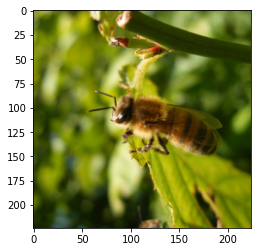

In [35]:
## load the entire dataset
x, y = next(iter(train_dataset))

## print one example
dim = x.shape[1]
print("Dimension of image:", x.shape, "\n",
      "Dimension of labels", y.shape)

plt.imshow(x[150].reshape(1, 3, 224, 224).squeeze().T.numpy()) # 데이터가 뽑아와지는 것을 확인할 수 있음

In [38]:
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LR, self).__init__()
        #initialize parameters
        self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        ## 직접 미분하기 때문에 parameter로 선언할 필요 없음
        self.grads = {"dw": torch.zeros(dim, 1, dtype=torch.float).to(device), 
                      "db": torch.scalar_tensor(0).to(device)}
        self.lr = lr.to(device)
        
    def forward(self, x): # y_hat 값을 구함
        ## compute forward
        z = torch.mm(self.w.T, x) + self.b
        a = self.sigmoid(z)
        return a
    
    def sigmoid(self, z):
        return 1/(1 + torch.exp(-z))
    
    def backward(self, x, yhat, y): # 미분 값
        ## compute backward
        self.grads["dw"] = (1/x.shape[1])*torch.mm(x,(yhat-y).T)
        self.grads["db"] = (1/x.shape[1])*torch.sum(yhat-y)
        
    def optimize(self): # 미분에 대한 update 값
        ## optimization step
        self.w = self.w - self.lr*self.grads["dw"]
        self.b = self.b - self.lr*self.grads["db"]

## utility functions
def loss(yhat, y):
  m = y.size()[1]
  return -(1/m)* torch.sum(y*torch.log(yhat) + (1 - y) * torch.log(1-yhat))

def predict(yhat, y):
  y_prediction = torch.zeros(1, y.size()[1])
  for i in range(yhat.size()[1]):
    if yhat[0, i] <= 0.5:
      y_prediction[0, i] = 0
    else:
      y_prediction[0, i] = 1
  return 100 - torch.mean(torch.abs(y_prediction - y)) * 100

In [40]:
## model pretesting
x, y = next(iter(train_dataset))

## flatten/transform the data
x_flatten = x.T
y = y.unsqueeze(0)

## num_px is the dimension of the images
dim = x_flatten.shape[0]

## model instance
model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device)) # 학습시킴
yhat = yhat.data.cpu()

## calculate loss # 학습 전 데이터
cost = loss(yhat, y)
prediction = predict(yhat, y)
print("Cost: ", cost)
print("Accuracy: ", prediction)

## backpropagate
model.backward(x_flatten.to(device), yhat.to(device), y.to(device)) # 학습시킴
model.optimize()

## ctrl + enter 할 때마다 한 번씩 학습이 되어 Cost와 Accuracy가 update됨 # 현재는 저장되지 않아서 동일한 값 출력됨

Cost:  tensor(0.6931)
Accuracy:  tensor(45.7516)


In [43]:
## hyperparams
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

## transform the data
def transform_data(x, y):
  x_flatten = x.T
  y = y.unsqueeze(0)
  return x_flatten, y

## training the model
for i in range(num_iterations): # 실제로는 for문을 돌면서 epoch만큼 학습시킴
  # data가져옴
  x, y = next(iter(train_dataset))
  test_x, test_y = next(iter(test_dataset))
  x, y = transform_data(x, y)
  test_x, test_y = transform_data(test_x, test_y)

  # forward
  yhat = lrmodel.forward(x.to(device))
  cost = loss(yhat.data.cpu(), y)
  train_pred = predict(yhat, y)

  # backward # AutoGrad를 사용하지 않고 직접 구현
  lrmodel.backward(x.to(device),
                   yhat.to(device),
                   y.to(device))
  lrmodel.optimize()

  ## test
  yhat_test = lrmodel.forward(test_x.to(device))
  test_pred = predict(yhat_test, test_y)

  if i % 10 == 0:
    costs.append(cost)

  if i % 10 == 0:
    print("Cost after iteration {}: {} | Train Acc: {} | Test Acc: {}".format(i, cost, train_pred, test_pred))

Cost after iteration 0: 0.6931472420692444 | Train Acc: 50.40983581542969 | Test Acc: 45.75163269042969
Cost after iteration 10: 0.6691471338272095 | Train Acc: 64.3442611694336 | Test Acc: 54.24836730957031
Cost after iteration 20: 0.6513182520866394 | Train Acc: 68.44261932373047 | Test Acc: 54.24836730957031
Cost after iteration 30: 0.6367825865745544 | Train Acc: 68.03278350830078 | Test Acc: 54.24836730957031
Cost after iteration 40: 0.6245337724685669 | Train Acc: 69.67213439941406 | Test Acc: 54.90196228027344
Cost after iteration 50: 0.6139225959777832 | Train Acc: 70.90164184570312 | Test Acc: 56.20914840698242
Cost after iteration 60: 0.6045235991477966 | Train Acc: 72.54098510742188 | Test Acc: 56.86274337768555
Cost after iteration 70: 0.5960512161254883 | Train Acc: 74.18032836914062 | Test Acc: 57.51633834838867
Cost after iteration 80: 0.5883085131645203 | Train Acc: 73.77049255371094 | Test Acc: 57.51633834838867
Cost after iteration 90: 0.5811557769775391 | Train Acc: 

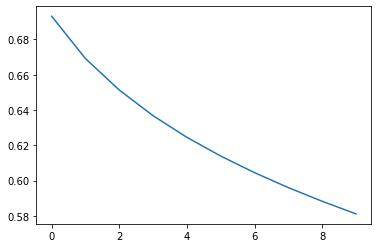

In [44]:
## the trend in the context of loss
plt.plot(costs)
plt.show()